# Feature Engineering

Parte: T-Bag

Features:
* Owner_Type
* Engine
* Seats

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import data
data = pd.read_csv('../input/train.csv')
# visualize first 5 rows
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [5]:
print(data.isnull().sum())

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64


## Owner_Type

In [10]:
print(data['Owner_Type'].nunique())
print(data['Owner_Type'].unique())

4
['First' 'Second' 'Fourth & Above' 'Third']


Como só tem 4 valores distintos vou discretizar, mas primeiro analisar a distribuição

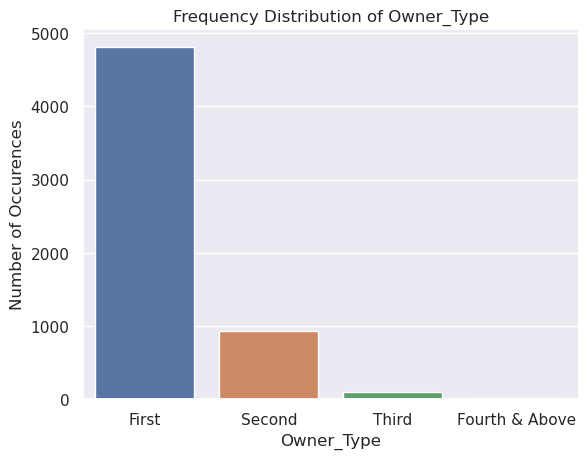

Owner_Type
First             4811
Second             925
Third              103
Fourth & Above       8
Name: count, dtype: int64


In [12]:
incidents_count = data['Owner_Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency Distribution of Owner_Type')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Owner_Type', fontsize=12)
plt.show()
print(incidents_count)

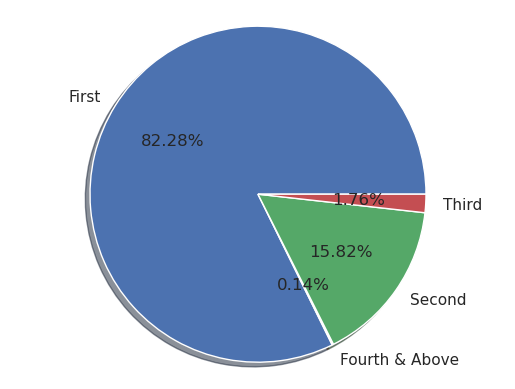

In [14]:
labels = data['Owner_Type'].astype('category').cat.categories.tolist()
counts = data['Owner_Type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal')
plt.show()

### Coisas a Retirar:

Como temos poucas ocorrencias de alguns valores, se tiver uma boa correlação podemos utilizar pra prever

### Discretizar

In [16]:
replace_map = {'Owner_Type': { 'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above':4 }}
print(replace_map)

{'Owner_Type': {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}}


In [18]:
data.replace(replace_map, inplace=True)
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,1,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,1,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
5843,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,1,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
5844,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
5845,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,1,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


## Engine

Analisar os valores e se tem valores em falta

In [31]:
print(f"Número de valores em falta: {data['Engine'].isnull().sum()}")
print(f"Número de valores distintos: {data['Engine'].nunique()}")
print(f"Tipo da coluna {data['Engine'].dtypes}")
print(data['Engine'].head())

Número de valores em falta: 36
Número de valores distintos: 140
Tipo da coluna object
0    1582 CC
1    1199 CC
2    1248 CC
3    1968 CC
4    1461 CC
Name: Engine, dtype: object


Verificar se todos os valores acabam em CC

In [46]:
condition = True
for val in data['Engine'].dropna():
    _, cc = val.split(" ")
    if cc != "CC":
        condition = False
if condition:
    print("Acabam todos em CC (menos os na)")
else:
    print("Não acabam todos em CC (menos os na)")

Acabam todos em CC (menos os na)


Ou seja, podemos substituir apenas pelo número se necessário

### Tratamento de valores em falta

Como já verificamos tem 36 valores em falta que devem ser tratados.

Para fazer o tratamento vou criar uma copia do dataset e verificar a correlação desta variável como numérica com as outras

In [60]:
# Função pra transformar valor em int
def removeCC(val):
    num, _ = val.split(" ")
    return float(num)

data_2 = data.copy()
data_2['Engine'] = data_2['Engine'].map(removeCC, na_action="ignore")
data_2['Engine'].head()

0    1582.0
1    1199.0
2    1248.0
3    1968.0
4    1461.0
Name: Engine, dtype: float64

In [68]:
engine_corr = data_2.corr(method='pearson', numeric_only=True)
print(engine_corr['Engine'])

Unnamed: 0          -0.006583
Year                -0.068473
Kilometers_Driven    0.093179
Owner_Type           0.058908
Engine               1.000000
Seats                0.400023
Price                0.656374
Name: Engine, dtype: float64


Podemos verificar que 'Engine' tem uma correlação de coeficiente 0.65 com 'Price', pelo que podemos tentar substituir os valores de Engine em falta tendo isso em conta

## Analisar a Correlação

<Axes: >

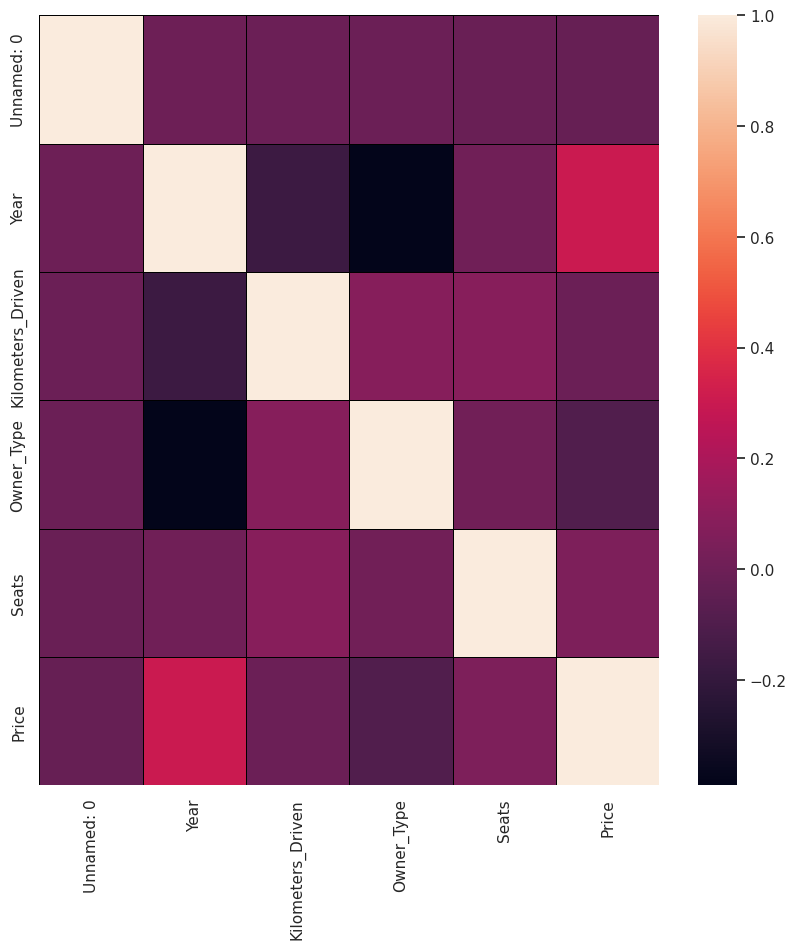

In [62]:
fig = plt.figure(figsize=(10,10))

corr = data.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, linecolor="black", linewidths=0.5)